## **SIMPLE INFORMATION RETRIEVAL SYSTEM**

---



Tahap 1 . Persiapkan library yang akan digunakan dalam pemrosesan

In [ ]:
import nltk #Library yang umumnya digunakan untuk Pemrosesan Bahasa Alami (NLP)
import re #Library untuk memainkan regex
import math #Library untuk menggunakan beberapa fungsi matematika
import pandas as pd

nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Tahap 2. Mengambil sejumlah dokumen yang akan digunakan sebagai basis pencarian

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/datasets/movies_metadata.csv'

df = pd.read_csv(file_path)
print(df.shape)
df.info()

Mounted at /content/drive
(45466, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date    

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Tahap 3. Pemilihan data yang akan digunakan

In [ ]:
df = df[0:200]
df = df[['id', 'title', 'overview']]
df.dropna(inplace=True)
count_doc = len(df.index)
print(df.shape)
df.head()

(199, 3)


,id,title,overview
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,8844,Jumanji,When siblings Judy and Peter discover an encha...
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...


Tahap 4. Memproses case folding dari content teks

In [ ]:
clean_overview = []
for row in df['overview']:
  clean_overview.append(row.casefold())
df['overview_clean'] = clean_overview
df.head()

,id,title,overview,overview_clean
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...","led by woody, andy's toys live happily in his ..."
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,when siblings judy and peter discover an encha...
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,a family wedding reignites the ancient feud be...
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...","cheated on, mistreated and stepped on, the wom..."
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,just when george banks has recovered from his ...


Tahap 5. Menghilangkan Karakter yang tidak berguna

In [ ]:
re_clean_content = []
for i in df['overview_clean']:
  content_rm_regex = re.sub(r'\W', ' ', i) # Menghilangkan special characters
  content_rm_regex = re.sub(r'\s+[a-zA-Z]\s+', ' ', content_rm_regex) # Menghilangkan semua single characters
  content_rm_regex = re.sub(r'\^[a-zA-Z]\s+', ' ', content_rm_regex) # Menghilangkan single characters pada awal document
  content_rm_regex = re.sub(r'\s+', ' ', content_rm_regex, flags=re.I) # Mengganti multiple space menjadi single space

  re_clean_content.append(content_rm_regex)

df['overview_clean'] = re_clean_content
df.head()

,id,title,overview,overview_clean
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",led by woody andy toys live happily in his roo...
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,when siblings judy and peter discover an encha...
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,a family wedding reignites the ancient feud be...
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",cheated on mistreated and stepped on the women...
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,just when george banks has recovered from his ...


Tahap 6. Melakukan Tokenization dan Menghilangkan Kata tidak Berguna (Stopword). Dan memasukkan kata tersebut ke dalam kategori Unique Word pada setiap Dokumennya.

In [ ]:
unique_word_all = []
filtered_word = [[] for i in range(count_doc)]
index = 0
for i in df['overview_clean']:
  word_tokens = word_tokenize(i)
  
  for w in word_tokens:
    if w not in stop_words:
      filtered_word[index].append(w)
      if w not in unique_word_all:
        unique_word_all.append(w)

  index = index + 1

for i in range(count_doc):
  print(filtered_word[i])

['led', 'woody', 'andy', 'toys', 'live', 'happily', 'room', 'andy', 'birthday', 'brings', 'buzz', 'lightyear', 'onto', 'scene', 'afraid', 'losing', 'place', 'andy', 'heart', 'woody', 'plots', 'buzz', 'circumstances', 'separate', 'buzz', 'woody', 'owner', 'duo', 'eventually', 'learns', 'put', 'aside', 'differences']
['siblings', 'judy', 'peter', 'discover', 'enchanted', 'board', 'game', 'opens', 'door', 'magical', 'world', 'unwittingly', 'invite', 'alan', 'adult', 'trapped', 'inside', 'game', '26', 'years', 'living', 'room', 'alan', 'hope', 'freedom', 'finish', 'game', 'proves', 'risky', 'three', 'find', 'running', 'giant', 'rhinoceroses', 'evil', 'monkeys', 'terrifying', 'creatures']
['family', 'wedding', 'reignites', 'ancient', 'feud', 'next', 'door', 'neighbors', 'fishing', 'buddies', 'john', 'max', 'meanwhile', 'sultry', 'italian', 'divorcée', 'opens', 'restaurant', 'local', 'bait', 'shop', 'alarming', 'locals', 'worry', 'scare', 'fish', 'away', 'less', 'interested', 'seafood', 'coo

Tahap 7. Mempersiapkan Linked List untuk menyimpan Unique Word beserta informasi dokumen yang terdapat Unique Word dan Frekuensi Unique Word tersebut dalam suatu dokumen.

In [ ]:
class Node:
  def __init__(self ,docId, freq = None):
    self.freq = freq
    self.doc = docId
    self.next = None
    
class SlinkedList:
  def __init__(self ,head = None):
    self.head = head

Tahap 8. Melakukan Pendataan Unique Word dan Frekuensinya

In [ ]:
linked_list_data = {}
for word in unique_word_all:
  linked_list_data[word] = SlinkedList()
  linked_list_data[word].head = Node(1,Node)

for i in range(count_doc):
  for word in unique_word_all:
    if filtered_word[i].count(word) > 0 :
      word_list = linked_list_data[word].head
      while word_list.next is not None:
        word_list = word_list.next
      word_list.next = Node(i, filtered_word[i].count(word))

for word in unique_word_all:
  info_cetak = "";
  info_cetak = info_cetak + word + " -> "
  word_list = linked_list_data[word].head
  while word_list.next is not None:
    word_list = word_list.next
    info_cetak = info_cetak + "[DocID:" + str(word_list.doc) + ";Freq:" + str(word_list.freq) + "] -> "
  print(info_cetak)

led -> [DocID:0;Freq:1] -> [DocID:82;Freq:1] -> 
woody -> [DocID:0;Freq:3] -> 
andy -> [DocID:0;Freq:3] -> [DocID:179;Freq:1] -> 
toys -> [DocID:0;Freq:1] -> [DocID:127;Freq:1] -> 
live -> [DocID:0;Freq:1] -> [DocID:61;Freq:1] -> [DocID:63;Freq:1] -> [DocID:75;Freq:1] -> [DocID:81;Freq:2] -> [DocID:90;Freq:1] -> 
happily -> [DocID:0;Freq:1] -> [DocID:53;Freq:1] -> 
room -> [DocID:0;Freq:1] -> [DocID:1;Freq:1] -> [DocID:17;Freq:1] -> [DocID:48;Freq:1] -> [DocID:170;Freq:1] -> 
birthday -> [DocID:0;Freq:1] -> [DocID:58;Freq:1] -> 
brings -> [DocID:0;Freq:1] -> [DocID:124;Freq:1] -> [DocID:137;Freq:1] -> 
buzz -> [DocID:0;Freq:3] -> 
lightyear -> [DocID:0;Freq:1] -> 
onto -> [DocID:0;Freq:1] -> [DocID:171;Freq:1] -> 
scene -> [DocID:0;Freq:1] -> [DocID:131;Freq:1] -> 
afraid -> [DocID:0;Freq:1] -> 
losing -> [DocID:0;Freq:1] -> [DocID:55;Freq:1] -> 
place -> [DocID:0;Freq:1] -> [DocID:17;Freq:1] -> [DocID:32;Freq:1] -> [DocID:154;Freq:1] -> [DocID:172;Freq:1] -> [DocID:175;Freq:1] -> 
hea

Tahap 9. Melakukan perekaman query pencarian, dan melakukan pemrosesan awal dari query yang dimasukkan.

In [ ]:
query = input('Enter your query:')
query_casefold = query.casefold() # Mengubah query menjadi huruf kecil semua

query_rm_regex = re.sub(r'\W', ' ', query_casefold) # Menghilangkan special characters
query_rm_regex = re.sub(r'\s+[a-zA-Z]\s+', ' ', query_rm_regex) # Menghilangkan semua single characters
query_rm_regex = re.sub(r'\^[a-zA-Z]\s+', ' ', query_rm_regex) # Menghilangkan single characters pada awal document
query_rm_regex = re.sub(r'\s+', ' ', query_rm_regex, flags=re.I)

filtered_query = []
query_token = word_tokenize(query_rm_regex)
for w in query_token:
  if w not in stop_words:
    filtered_query.append(w)
    
print(filtered_query)

Enter your query:killing president of united states
['killing', 'president', 'united', 'states']


Tahap 10. Menghitung IDF dari setiap term pada query

In [ ]:
idf_query = {}

#Looping akan sebanyak term di query
for word in filtered_query :
  jumlah_df = 0
  
  #Looping akan sebanyak jumlah dokumen di corpus untuk mencari jumlah dokumen yang mengandung setiap term pada query
  for i in range(count_doc):
    if (filtered_word[i].count(word) > 0):
      jumlah_df = jumlah_df+1
  
  if (jumlah_df == 0):
    idf_query[word] = 0
  else :
    idf_query[word] = math.log(count_doc/jumlah_df,2)

print(idf_query)

{'killing': 5.314696525656286, 'president': 6.051662119822492, 'united': 7.636624620543649, 'states': 7.636624620543649}


Tahap 11. Membuat Tabel Tf-Idf dari term query pada setiap dokumen dengan tf menggunakan perhitungan logaritmic tf

In [ ]:
matrix_tf_idf = [[] for i in range(count_doc+1)]

#Looping akan sebanyak term di query
for word in filtered_query :
  
  #Looping akan sebanyak jumlah dokumen di corpus
  for i in range(count_doc):
    if (filtered_word[i].count(word) == 0):
      matrix_tf_idf[i].append(0)
    else:
      nilai_tf_idf = idf_query[word] * (1 + math.log(filtered_word[i].count(word)))
      matrix_tf_idf[i].append(nilai_tf_idf)
  
  matrix_tf_idf[i+1].append(idf_query[word])

for i in range(count_doc+1):
  print(matrix_tf_idf[i])

[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 6.051662119822492, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 6.051662119822492, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[5.314696525656286, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 7.636624620543649, 7.636624620543649]
[0, 0, 0, 0]
[0, 0, 0, 0]
[5.314696525656286, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 

Tahap 12. Menghitung nilai *Similarity Coeficient* pada setiap dokumen terhadap query

In [ ]:
SC_Doc = [0 for i in range(count_doc)]
index_query = count_doc

for i in range(count_doc):
  index_kolom = 0
  nilai_SC = 0
  for nilai in matrix_tf_idf[i]:
    nilai_SC = nilai_SC + (nilai * matrix_tf_idf[index_query][index_kolom])
    index_kolom = index_kolom + 1
  
  SC_Doc[i] = nilai_SC

#for i in range(count_doc):
#  print(SC_Doc[i])

df_result = df.copy()
df_result['similarity coefficient'] = SC_Doc
df_result.head()

,id,title,overview,overview_clean,similarity coefficient
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",led by woody andy toys live happily in his roo...,0.0
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,when siblings judy and peter discover an encha...,0.0
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,a family wedding reignites the ancient feud be...,0.0
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",cheated on mistreated and stepped on the women...,0.0
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,just when george banks has recovered from his ...,0.0


Tahap 13. Membentuk vektor TF-IDF menggunakan library TfidiVecorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['overview_clean'])

Tahap 14. Melakukan operasi kmeans mulai dari kluster 2 hingga 10 untuk menentukan kluster terbaik menggunakan elbow method

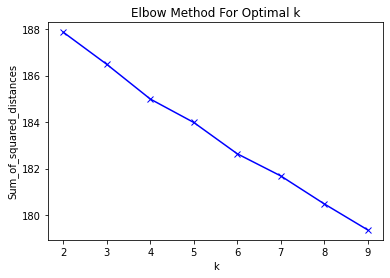

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Tahap 15. Menerapkan kmeans pada dataset

In [ ]:
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
df_result['cluster'] = labels
df_result.sort_values(['similarity coefficient'], ascending=False).head(10)

,id,title,overview,overview_clean,similarity coefficient,cluster
41,11443,Dead Presidents,"Depicts a heist of old bills, retired from cir...",depicts heist of old bills retired from circul...,116.636071,5
10,9087,The American President,"Widowed U.S. president Andrew Shepherd, one of...",widowed s president andrew shepherd one of the...,36.622614,3
13,10858,Nixon,An all-star cast powers this epic look at Amer...,an all star cast powers this epic look at amer...,36.622614,1
154,1775,Canadian Bacon,Canadian Bacon is the only fictitious film fro...,canadian bacon is the only fictitious film fro...,36.622614,2
195,281,Strange Days,Set in the year 1999 during the last days of t...,set in the year 1999 during the last days of t...,28.245999,3
193,9348,Species,"In 1993, the Search for Extra Terrestrial Inte...",in 1993 the search for extra terrestrial intel...,28.245999,5
22,9691,Assassins,Assassin Robert Rath arrives at a funeral to k...,assassin robert rath arrives at funeral to kil...,28.245999,3
75,9102,Screamers,"(SIRIUS 6B, Year 2078) On a distant mining pla...",sirius 6b year 2078 on distant mining planet ...,28.245999,2
44,577,To Die For,Susan wants to work in television and will the...,susan wants to work in television and will the...,28.245999,2
132,124636,Sonic Outlaws,Within days after the release of Negativland's...,within days after the release of negativland c...,0.000000,3


Tahap 16. Menampilkan hasil pencarian dan mengurutkan (ranking) dokumen berdasarkan relevansinya

In [ ]:
cluster = max(df_result.sort_values(['similarity coefficient'], ascending=False).head(10)['cluster'])
df_result.loc[df_result.cluster == 2].sort_values(['similarity coefficient', 'cluster'], ascending=False)[:10]

,id,title,overview,overview_clean,similarity coefficient,cluster
154,1775,Canadian Bacon,Canadian Bacon is the only fictitious film fro...,canadian bacon is the only fictitious film fro...,36.622614,2
44,577,To Die For,Susan wants to work in television and will the...,susan wants to work in television and will the...,28.245999,2
75,9102,Screamers,"(SIRIUS 6B, Year 2078) On a distant mining pla...",sirius 6b year 2078 on distant mining planet ...,28.245999,2
7,45325,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",a mischievous young boy tom sawyer witnesses m...,0.000000,2
25,16420,Othello,The evil Iago pretends to be friend of Othello...,the evil iago pretends to be friend of othello...,0.000000,2
27,17015,Persuasion,This film adaptation of Jane Austen's last nov...,this film adaptation of jane austen last novel...,0.000000,2
65,11525,Lawnmower Man 2: Beyond Cyberspace,Jobe is resuscitated by Jonathan Walker. He wa...,jobe is resuscitated by jonathan walker he wan...,0.000000,2
71,28387,Kicking and Screaming,"After college graduation, Grover's girlfriend ...",after college graduation grover girlfriend jan...,0.000000,2
74,36929,Big Bully,A writer returns to his hometown where he face...,a writer returns to his hometown where he face...,0.000000,2
101,2045,Unforgettable,Ray Liotta stars as a medical examiner who has...,ray liotta stars as medical examiner who has b...,0.000000,2
